In [1]:
import pandas as pd
import psycopg2

In [2]:
# Establishing the connection to PostgreSQL
conn = psycopg2.connect(
    dbname="publishing_industry", user="postgres", password="240998", host="localhost", port="5432"
)
query_1 = "SELECT * FROM customer;"  # SQL query to fetch data
df_1 = pd.read_sql_query(query_1, conn)  # Load the data into a DataFrame
conn.close()

# Check data
df_1.head()
df_1.isnull().sum()

C:\Users\abdul\AppData\Local\Temp\ipykernel_3548\4072609793.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql_query(query_1, conn)  # Load the data into a DataFrame


customer_id    0
first_name     0
last_name      0
email          0
dtype: int64

In [3]:
conn = psycopg2.connect(
    dbname="publishing_industry", user="postgres", password="240998", host="localhost", port="5432"
)
query_2 = "SELECT * FROM address;"  # SQL query to fetch data
df_2 = pd.read_sql_query(query_2, conn)  # Load the data into a DataFrame
conn.close()

df_2.head()

C:\Users\abdul\AppData\Local\Temp\ipykernel_3548\31171213.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql_query(query_2, conn)  # Load the data into a DataFrame


,address_id,street_number,street_name,city,country_id
0,1,57,Glacier Hill Avenue,Torbat-e Jām,95
1,2,86,Dottie Junction,Beaumont,37
2,3,292,Ramsey Avenue,Cayambe,60
3,4,5618,Thackeray Junction,Caldas,47
4,5,4,2nd Park,Ngunguru,153


In [4]:
import psycopg2
import pandas as pd

# Database connection
conn = psycopg2.connect(
    dbname="publishing_industry", 
    user="postgres", 
    password="240998", 
    host="localhost", 
    port="5432"
)

# Fetch all table names
cursor = conn.cursor()
cursor.execute("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public';
""")
tables = cursor.fetchall()

# Load each table into a dictionary
table_data = {}
for table in tables:
    table_name = table[0]
    table_data[table_name] = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)
    print(f"Loaded table: {table_name} - {table_data[table_name].shape[0]} rows.")

cursor.close()
conn.close()


C:\Users\abdul\AppData\Local\Temp\ipykernel_3548\3401810792.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_data[table_name] = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)


Loaded table: book_language - 27 rows.
Loaded table: book - 11127 rows.
Loaded table: publisher - 2264 rows.
Loaded table: book_author - 17642 rows.
Loaded table: author - 9235 rows.
Loaded table: address_status - 2 rows.
Loaded table: country - 232 rows.
Loaded table: address - 1000 rows.
Loaded table: customer - 2000 rows.
Loaded table: customer_address - 3350 rows.
Loaded table: cust_order - 7550 rows.
Loaded table: shipping_method - 4 rows.
Loaded table: order_line - 15400 rows.
Loaded table: order_history - 22346 rows.
Loaded table: order_status - 6 rows.


In [16]:
df_customer = table_data['customer']
df_customer.head()
print(df_customer.isnull().sum())

df_book_language = table_data['book_language']
df_book_language.head()
print(df_book_language.isnull().sum())

df_book = table_data['book']
df_book.head()
print(df_book.isnull().sum())

df_publisher = table_data['publisher']
df_publisher.head()
print(df_publisher.isnull().sum())



customer_id    0
first_name     0
last_name      0
email          0
dtype: int64
language_id      0
language_code    0
language_name    0
dtype: int64
book_id             0
title               0
isbn13              0
language_id         0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
publisher_id      0
publisher_name    0
dtype: int64


In [18]:
conn = psycopg2.connect(
    dbname="publishing_industry", 
    user="postgres", 
    password="240998", 
    host="localhost", 
    port="5432"
)

# Fetch all table names
cursor = conn.cursor()
query = """ 
SELECT c.customer_id, c.first_name, o.order_id, b.title, o.order_date  
FROM customer c  
JOIN cust_order o ON c.customer_id = o.customer_id  
JOIN order_line ol ON o.order_id = ol.order_id  
JOIN book b ON ol.book_id = b.book_id;
"""  
data = pd.read_sql_query(query, conn)  

C:\Users\abdul\AppData\Local\Temp\ipykernel_3548\177572061.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [19]:
data.head()

,customer_id,first_name,order_id,title,order_date
0,1,Ursola,1,The Collected Poems of Wilfred Owen,2022-12-05 10:39:21.422412
1,2,Ruthanne,2,M Is for Mayflower: A Massachusetts Alphabet,2022-01-15 12:38:12.360012
2,3,Reidar,3,Gerontius,2023-01-01 00:18:49.329612
3,4,Rich,4,Visiting Mrs Nabokov and Other Excursions,2023-05-18 12:37:54.561612
4,5,Carline,5,Immigrant Acts: On Asian American Cultural Pol...,2022-11-03 18:47:19.531212


In [20]:
data = data.dropna(axis=1, thresh=0.5 * len(data))  


In [15]:
for table_name, df in table_data.items():
    print(f"\n EDA for Table: {table_name}")
    print(df.head())  # Display first 5 rows
    print(df.info())  # Display column data types and non-null counts
    print("\nMissing Values:")
    print(df.isnull().sum())  # Display missing values
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())  # Check duplicate rows
    print(df.describe())  # Basic statistical summary
    print("-" * 50)



 EDA for Table: book_language
   language_id language_code          language_name
0            1           eng                English
1            2         en-US  United States English
2            3           fre                 French
3            4           spa                Spanish
4            5         en-GB        British English
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   language_id    27 non-null     int64 
 1   language_code  27 non-null     object
 2   language_name  27 non-null     object
dtypes: int64(1), object(2)
memory usage: 780.0+ bytes
None

Missing Values:
language_id      0
language_code    0
language_name    0
dtype: int64

Duplicate Rows:
0
       language_id
count    27.000000
mean     14.000000
std       7.937254
min       1.000000
25%       7.500000
50%      14.000000
75%      20.500000
max      27.000000
---

In [7]:
# Example: Join book and author details
book_author_df = table_data['book'].merge(
    table_data['book_author'], on='book_id'
).merge(
    table_data['author'], on='author_id'
)
print(book_author_df.head())


   book_id                                              title       isbn13  \
0        1        The World's First Love: Mary  Mother of God   8987059752   
1        2                                     The Illuminati  20049130001   
2        3                                 The Servant Leader  23755004321   
3        4  What Life Was Like in the Jewel in the Crown: ...  34406054602   
4        5  Cliffs Notes on Aristophanes' Lysistrata  The ...  49086007763   

   language_id  num_pages publication_date  publisher_id  author_id  \
0            2        276       1996-09-01          1010       2778   
1            1        352       2004-10-04          1967       5049   
2            1        128       2003-03-11          1967       4902   
3            1        168       1999-09-01          1978       8651   
4            1         80       1983-12-29           416       8904   

            author_name  
0       Fulton J. Sheen  
1         Larry Burkett  
2  Kenneth H. Blanchard  


C:\Users\abdul\AppData\Local\Temp\ipykernel_3548\210980521.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  table_data['cust_order'].set_index('order_date').resample('M').size().plot(kind='line')


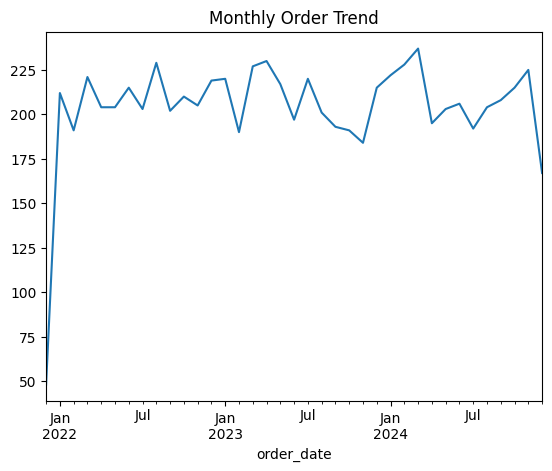

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Monthly Order Trend
table_data['cust_order']['order_date'] = pd.to_datetime(table_data['cust_order']['order_date'])
table_data['cust_order'].set_index('order_date').resample('M').size().plot(kind='line')
plt.title('Monthly Order Trend')
plt.show()


Customers, cust_order and books dataframe for finding the relationship between them

In [ ]:
#taking cust_order and books dataframe for finding the relationship between them

df_book = table_data['book']
print(df_book.head())

df_cust_order = table_data["cust_order"]
print(df_cust_order.head())


   book_id                                              title       isbn13  \
0        1        The World's First Love: Mary  Mother of God   8987059752   
1        2                                     The Illuminati  20049130001   
2        3                                 The Servant Leader  23755004321   
3        4  What Life Was Like in the Jewel in the Crown: ...  34406054602   
4        5  Cliffs Notes on Aristophanes' Lysistrata  The ...  49086007763   

   language_id  num_pages publication_date  publisher_id  
0            2        276       1996-09-01          1010  
1            1        352       2004-10-04          1967  
2            1        128       2003-03-11          1967  
3            1        168       1999-09-01          1978  
4            1         80       1983-12-29           416  
   order_id                 order_date  customer_id  shipping_method_id  \
0         1 2022-12-05 10:39:21.422412            1                   1   
1         2 2022-01-15 12:3

In [22]:

# Convert order_date to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Extract date components
data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month
data['order_day'] = data['order_date'].dt.day
data['order_weekday'] = data['order_date'].dt.weekday
data['is_weekend'] = data['order_weekday'].isin([5, 6]).astype(int)



In [23]:
customer_summary = data.groupby('customer_id').agg({
    'order_id': 'count',
    'order_date': ['min', 'max']
}).reset_index()

customer_summary.columns = ['customer_id', 'total_orders', 'first_order_date', 'last_order_date']

# Calculate recency
customer_summary['recency_days'] = (pd.Timestamp.now() - customer_summary['last_order_date']).dt.days


In [24]:
data['title_length'] = data['title'].apply(len)


In [25]:
data.head()

,customer_id,first_name,order_id,title,order_date,order_year,order_month,order_day,order_weekday,is_weekend,title_length
0,1,Ursola,1,The Collected Poems of Wilfred Owen,2022-12-05 10:39:21.422412,2022,12,5,0,0,35
1,2,Ruthanne,2,M Is for Mayflower: A Massachusetts Alphabet,2022-01-15 12:38:12.360012,2022,1,15,5,1,44
2,3,Reidar,3,Gerontius,2023-01-01 00:18:49.329612,2023,1,1,6,1,9
3,4,Rich,4,Visiting Mrs Nabokov and Other Excursions,2023-05-18 12:37:54.561612,2023,5,18,3,0,41
4,5,Carline,5,Immigrant Acts: On Asian American Cultural Pol...,2022-11-03 18:47:19.531212,2022,11,3,3,0,51


In [27]:
# 1. Convert order_date to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# 2. Extract Date Features
data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month
data['order_day'] = data['order_date'].dt.day
data['order_weekday'] = data['order_date'].dt.weekday
data['is_weekend'] = data['order_weekday'].isin([5, 6]).astype(int)

# 3. Customer Purchase Behavior
customer_summary = data.groupby('customer_id').agg({
    'order_id': 'count',
    'order_date': ['min', 'max']
}).reset_index()

# Rename Columns for clarity
customer_summary.columns = ['customer_id', 'total_orders', 'first_order_date', 'last_order_date']

# Calculate Recency (days since last order)
customer_summary['recency_days'] = (pd.Timestamp.now() - customer_summary['last_order_date']).dt.days

# Merge Summary Back to Original Data
data = data.merge(customer_summary[['customer_id', 'total_orders', 'recency_days']], on='customer_id', how='left')

# 4. Text Features
data['title_length'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(x.split()))

# 5. Handle Outliers (Example: Title Length)
Q1 = data['title_length'].quantile(0.25)
Q3 = data['title_length'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['title_length'] >= (Q1 - 1.5 * IQR)) & (data['title_length'] <= (Q3 + 1.5 * IQR))]

# Final Dataset Preview
data.head()

,customer_id,first_name,order_id,title,order_date,order_year,order_month,order_day,order_weekday,is_weekend,title_length,total_orders_x,recency_days_x,word_count,total_orders_y,recency_days_y
0,1,Ursola,1,The Collected Poems of Wilfred Owen,2022-12-05 10:39:21.422412,2022,12,5,0,0,35,61,21,6,61,21
1,2,Ruthanne,2,M Is for Mayflower: A Massachusetts Alphabet,2022-01-15 12:38:12.360012,2022,1,15,5,1,44,73,32,7,69,32
2,3,Reidar,3,Gerontius,2023-01-01 00:18:49.329612,2023,1,1,6,1,9,69,22,1,66,22
3,4,Rich,4,Visiting Mrs Nabokov and Other Excursions,2023-05-18 12:37:54.561612,2023,5,18,3,0,41,62,31,6,59,31
4,5,Carline,5,Immigrant Acts: On Asian American Cultural Pol...,2022-11-03 18:47:19.531212,2022,11,3,3,0,51,65,47,7,63,47


In [28]:
data.to_csv('final_features_dataset.csv', index=False)

In [44]:
import pandas as pd

# Load the dataset
data = pd.read_csv('final_features_dataset.csv')

# Display column names
print(data.columns)


Index(['customer_id', 'first_name', 'order_id', 'title', 'order_date',
       'order_year', 'order_month', 'order_day', 'order_weekday', 'is_weekend',
       'title_length', 'total_orders_x', 'recency_days_x', 'word_count',
       'total_orders_y', 'recency_days_y'],
      dtype='object')


In [45]:
# Ensure 'order_date' is in datetime format
data['order_date'] = pd.to_datetime(data['order_date'])

# Calculate recency for each customer
customer_summary = data.groupby('customer_id').agg({
    'order_date': 'max'
}).reset_index()

customer_summary['recency_days'] = (pd.Timestamp.now() - customer_summary['order_date']).dt.days

# Merge recency_days back into the main dataset
data = data.merge(customer_summary[['customer_id', 'recency_days']], on='customer_id', how='left')

# Verify the column
print(data.head())


   customer_id first_name  order_id  \
0            1     Ursola         1   
1            2   Ruthanne         2   
2            3     Reidar         3   
3            4       Rich         4   
4            5    Carline         5   

                                               title  \
0                The Collected Poems of Wilfred Owen   
1       M Is for Mayflower: A Massachusetts Alphabet   
2                                          Gerontius   
3          Visiting Mrs Nabokov and Other Excursions   
4  Immigrant Acts: On Asian American Cultural Pol...   

                  order_date  order_year  order_month  order_day  \
0 2022-12-05 10:39:21.422412        2022           12          5   
1 2022-01-15 12:38:12.360012        2022            1         15   
2 2023-01-01 00:18:49.329612        2023            1          1   
3 2023-05-18 12:37:54.561612        2023            5         18   
4 2022-11-03 18:47:19.531212        2022           11          3   

   order_weekday  i

In [48]:
# Calculate total orders per customer
customer_summary = data.groupby('customer_id').agg({
    'order_id': 'count'
}).reset_index()

customer_summary.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Merge total_orders back into the main dataset
data = data.merge(customer_summary[['customer_id', 'total_orders']], on='customer_id', how='left')

# Verify the updated dataset
print(data.head())


   customer_id first_name  order_id  \
0            1     Ursola         1   
1            2   Ruthanne         2   
2            3     Reidar         3   
3            4       Rich         4   
4            5    Carline         5   

                                               title  \
0                The Collected Poems of Wilfred Owen   
1       M Is for Mayflower: A Massachusetts Alphabet   
2                                          Gerontius   
3          Visiting Mrs Nabokov and Other Excursions   
4  Immigrant Acts: On Asian American Cultural Pol...   

                   order_date  order_year  order_month  order_day  \
0  2022-12-05 10:39:21.422412        2022           12          5   
1  2022-01-15 12:38:12.360012        2022            1         15   
2  2023-01-01 00:18:49.329612        2023            1          1   
3  2023-05-18 12:37:54.561612        2023            5         18   
4  2022-11-03 18:47:19.531212        2022           11          3   

   order_week

In [49]:
required_columns = ['total_orders', 'title_length', 'order_year', 'order_month', 'is_weekend']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print("Missing columns:", missing_columns)
else:
    print("All required columns are present.")


All required columns are present.


In [50]:
# Define churn: Customers with recency > 180 days
data['is_churn'] = (data['recency_days'] > 180).astype(int)
# Save the updated dataset
data.to_csv('final_features_dataset.csv', index=False)


In [51]:
from sklearn.model_selection import train_test_split

# Load the feature-engineered dataset
data = pd.read_csv('final_features_dataset.csv')

# Example Target Definitions:
# 1. Churn Prediction: Define churn as customers with high recency_days (e.g., > 180 days).
data['is_churn'] = (data['recency_days'] > 180).astype(int)

# 2. Genre Prediction (if genre column exists after preprocessing)
# Example: Assuming `genre` column exists
# data['genre'] = data['genre'].astype('category').cat.codes

# 3. Demand Forecasting: Predicting future order counts based on historical data.

# Splitting Dataset for Churn Prediction (as an example)
X = data[['total_orders', 'title_length', 'order_year', 'order_month', 'is_weekend']]
y = data['is_churn']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and Train the Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8608195055875381
Confusion Matrix:
 [[1698  187]
 [ 224  844]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1885
           1       0.82      0.79      0.80      1068

    accuracy                           0.86      2953
   macro avg       0.85      0.85      0.85      2953
weighted avg       0.86      0.86      0.86      2953



In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example setup for Demand Forecasting
X_demand = data[['order_year', 'order_month', 'total_orders']]
y_demand = data['total_orders']

X_train, X_test, y_train, y_test = train_test_split(X_demand, y_demand, test_size=0.2, random_state=42)

# Train Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and Evaluate
y_pred_demand = regressor.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_demand))
print("RMSE:", mean_squared_error (y_test, y_pred_demand, squared=False))


MAE: 2.401668434055534e-14
RMSE: 2.7579413503452244e-14


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
import joblib

# Save Churn Model
joblib.dump(clf, 'churn_model.pkl')

# Save Demand Model
joblib.dump(regressor, 'demand_model.pkl')


['churn_model.pkl']